In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Load the dataset from the local file
df = pd.read_csv('data/Titanic-Dataset.csv')

print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
# Get basic info about data types and null values
print("--- Dataset Info ---")
df.info()

print("\n--- Descriptive Statistics ---")
print(df.describe())

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB

--- Descriptive Statistics ---
         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662 

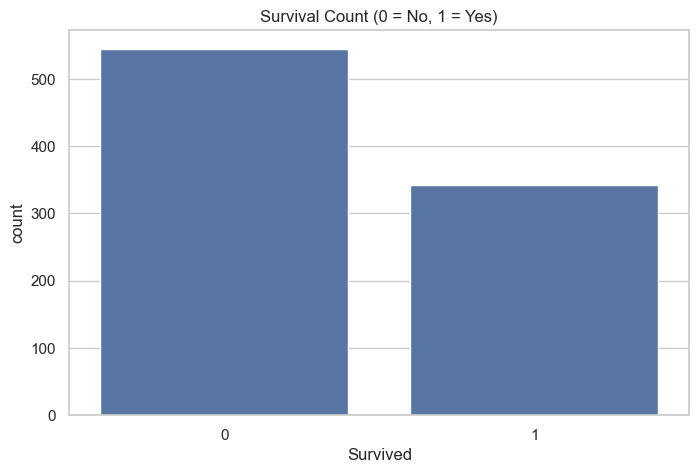

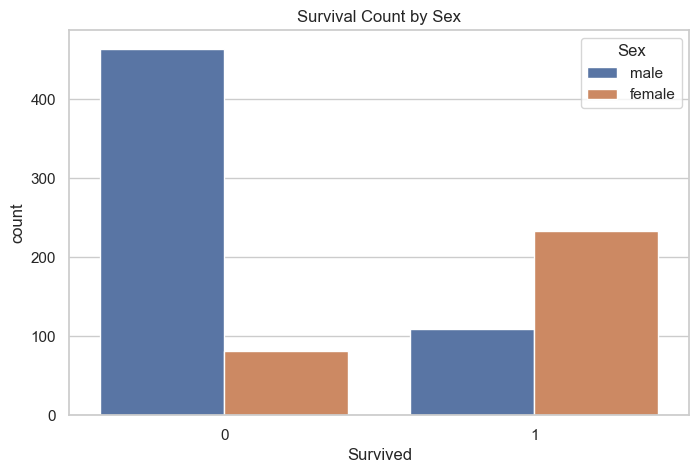

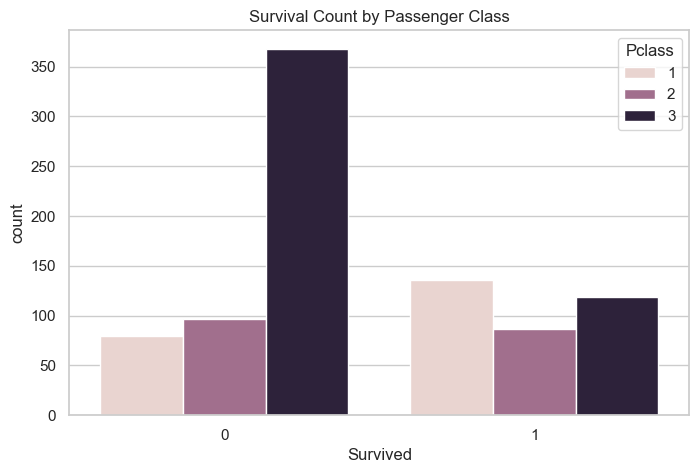

In [ ]:
# Visualize survival count
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

# Visualize survival by Sex
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')
plt.show()

# Visualize survival by Passenger Class
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

In [ ]:
print(df.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


In [ ]:
# --- Handle Missing 'Age' Values ---
# We'll fill missing ages with the median age of their passenger class.
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

# --- Feature Engineering: Create 'FamilySize' ---
# NOTE: Using the correct column names from your specific file
df['FamilySize'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard'] + 1

# --- Feature Engineering: Create 'IsAlone' ---
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

print("Data cleaning and feature engineering complete.")
print("Missing values after cleaning:")
# We only check for 'Age' now as the other missing columns didn't exist
print(df.isnull().sum())

Data cleaning and feature engineering complete.
Missing values after cleaning:
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
FamilySize                 0
IsAlone                    0
dtype: int64


In [ ]:
# Convert 'Sex' into a numerical format using one-hot encoding
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Drop columns that are no longer needed
# We use the correct column names for your dataset and remove 'Ticket'
df.drop(['Name', 'Siblings/Spouses Aboard', 'Parents/Children Aboard'], axis=1, inplace=True)

print("Categorical features encoded.")
df.head()

Categorical features encoded.


,Survived,Pclass,Age,Fare,FamilySize,IsAlone,Sex_male
0,0,3,22.0,7.2500,2,0,True
1,1,1,38.0,71.2833,2,0,False
2,1,3,26.0,7.9250,1,1,False
3,1,1,35.0,53.1000,2,0,False
4,0,3,35.0,8.0500,1,1,True


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale
numerical_features = ['Age', 'Fare', 'FamilySize']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("Numerical features standardized.")
print("Final preprocessed data:")
df.head()

Numerical features standardized.
Final preprocessed data:


,Survived,Pclass,Age,Fare,FamilySize,IsAlone,Sex_male
0,0,3,-0.529366,-0.503586,0.056543,0,True
1,1,1,0.604265,0.783412,0.056543,0,False
2,1,3,-0.245958,-0.490020,-0.562638,1,False
3,1,1,0.391709,0.417948,0.056543,0,False
4,0,3,0.391709,-0.487507,-0.562638,1,True
